## Смолев Владимир. Вариант 10.

### 0. Построим временной ряд.

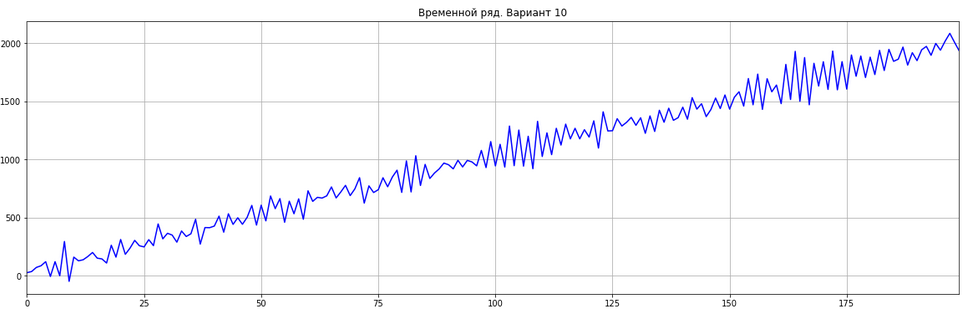

### 1. Используя процедуру Доладо, выяснить, относится ли наблюдаемый ряд к типу TSP.

Проверим наличие единичного корня для временного ряда. 

Оценим модель с константой и трендом с помощью теста Дики-Фуллера.


adf:  -10.7155865366

p-value:  7.90520101015e-17

Сравним с критическим значением из таблицы для 5% уровня уверенности.
$-10.71 < -3.41$

Следовательно единичных корней нет. Гипотеза $H_{0}$ - ряд DSP отвергается.

### 2. Для ряда типа TSP оценить  по МНК детерминированную составляющую ряда.

По методу наименьших квадратов оценим параметры модели.


$\hat \theta_{0} = 36.193290209, \hat \theta_{1} = 9.92046713358$

Тренд: $\hat m(t) = 36.193290209 + 9.92046713358 \cdot t$

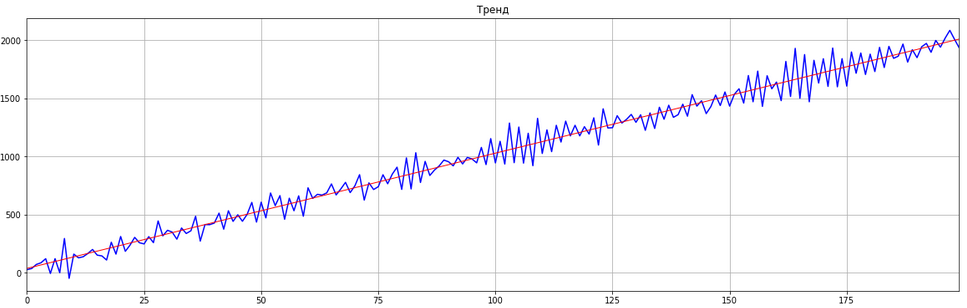

### 3.	Детрендировать ряд .  Провести идентификацию случайной составляющей ряда, выбрав в качестве базовых 2(3?) подходящие модели.

Вычтем из ряда тренд. 
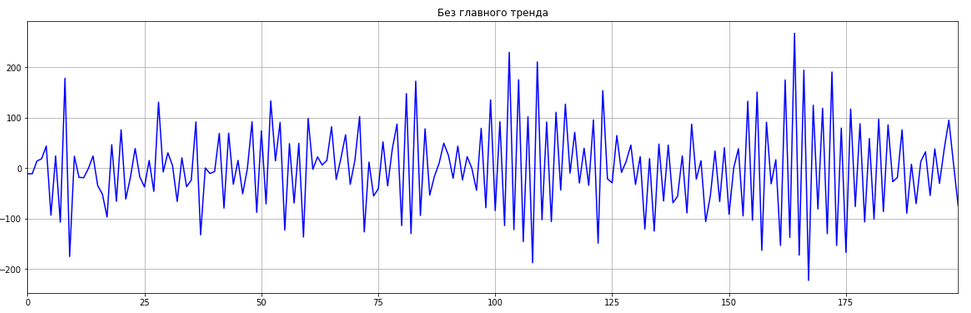

Построим ACF и PACF.
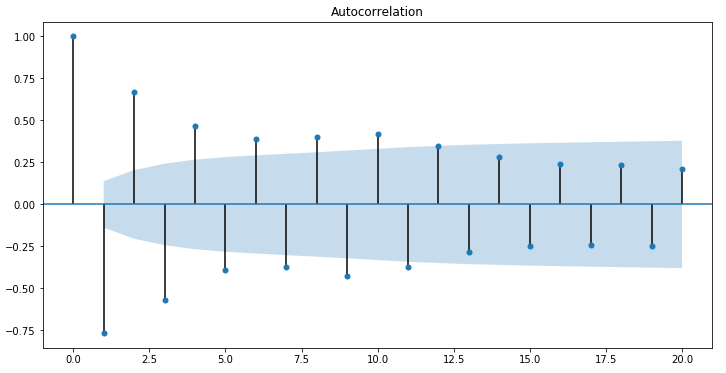
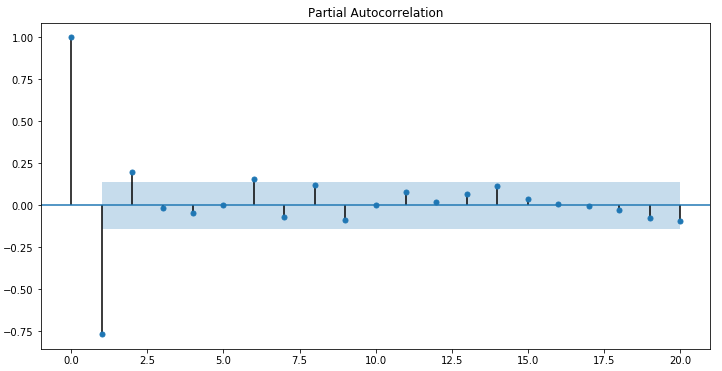

Доверительный интервал $(\frac{-1.96}{\sqrt{200}},\frac{1.96}{\sqrt{200}})$

В ACF больше 5% не попадают в доверительный интервал, значит не MA.

В PACF первые 2 или 3 точки не попадают в доверительный интервал. Следовательно будет рассматривать AR(2) и AR(3).


### 4.	Оценить параметры модели. Используя информационные критерии, выбрать адекватную модель.

Рассмотри модель AR(2)
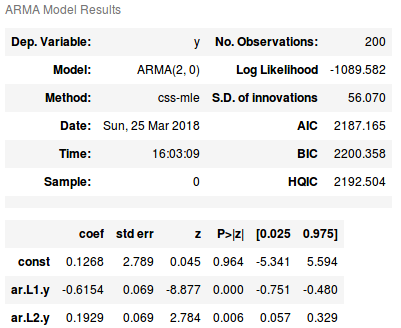
И модель AR(3)
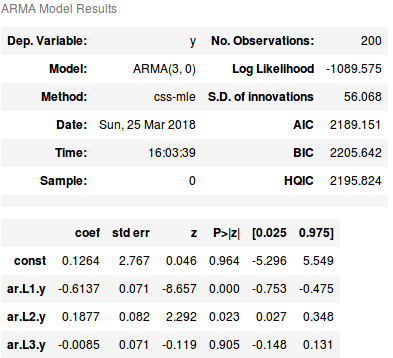

Значения AIC и BIC лучше у модели AR(2). (AIC 2187 < 2189 и  BIC 2200 < 2205)

Соответственно выбираем модель AR(2).

Со следующими коэффициентами (0.1268,-0.6154,0.1929)

### 5.	Провести диагностику остатков.

Построим коррелограмму остатков.

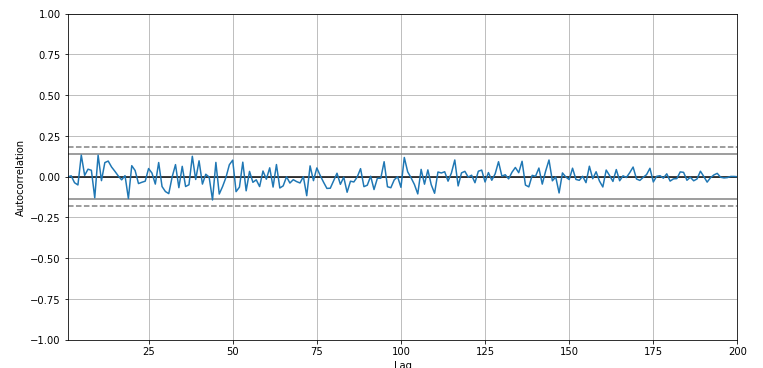

Все значения попадают в доверительный интервал. И значит они не коррелируют между собой.
Соответственно можно считать, что остатки белый шум.

Проведем тест Льюинга-Бокса

In [17]:
Q.head(100)

,Q-stat,p-value
0,4.991675,0.025470
1,6.214302,0.044728
2,6.269559,0.099207
3,7.876047,0.096226
4,12.960935,0.023748
5,13.422784,0.036792
6,13.892738,0.053122
7,14.970578,0.059720
8,15.339152,0.082031
9,19.212672,0.037643


Значение данной статистики и p-values, свидетельствуют о том, что гипотеза о случайности остатков не отвергается и данный процесс представляет «белый шум».

### 6.	Построить прогноз на один шаг.

$\xi_{201} \thicksim AR(2) + \hat m(t_{201})$

$\hat\xi_{200} = x_{200} - ( 36.193290209 + 9.92046713358 \cdot 200 ) = -85.25$

$\hat\xi_{199} = x_{199} - ( 36.193290209 + 9.92046713358 \cdot 199 ) = -1.47$

$E(\xi_{201}| \xi_{200}, \xi_{199}) + m(t_{201}) =  0.1268 - 0.6154\cdot \hat\xi_{200} + 0.1929 \cdot \hat\xi_{199} + 36.193290209+9.92046713358 \cdot 201 = 0.1268 - 0.6154 \cdot (-85.25) + 0.1929 \cdot (-1.47) + + 36.193290209 + 9.92046713358 \cdot 201 = 2082.513$

Предсказаний на следующий шаг 2082.513